In [1]:
import pandas as pd
import json
import matplotlib as matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from ipynb.fs.full.common import *



In [2]:
gameplays = pd.json_normalize(pd.Series(open(r"C:\Users\Yasmine Bogaert\Documents\thesis\dump\dump_30-03-2021\csv\gameplays.json").readlines()).apply(json.loads))

In [3]:
gameplays = preprocess_gameplays(gameplays)

In [5]:
gameplays = add_distance_per_jump(gameplays)

In [6]:
# umap needs numeric values
gameplays = convert_collisionObstacle_numeric(gameplays)

In [7]:
# sweep through all umap parameters, turns out the default parameters are good
if False:
    sns.set(style='white', context='notebook', rc={'figure.figsize':(30,20)})

    ns = [2, 5, 10, 20, 50, 100, 200]
    ds = [0.0, 0.1, 0.25, 0.5, 0.8, 0.99]
    x = len(ns)
    y = len(ds)

    game_data = gameplays[parameters].values

    fig, ax_array = plt.subplots(x, y)
    for i, n in enumerate(ns):
        for j, d in enumerate(ds):
            print( "({},{}) from ({},{})".format(i,j,len(ns),len(ds)) )
            u = umap_fit(game_data, n, d)
            ax = ax_array[i,j]
            ax.scatter(u[:,0], u[:,1])
            ax.text(0.99, 0.99, "n_neighbors: " + str(n) + ", min_dist: " + str(d)  , horizontalalignment='right', verticalalignment='top',  transform=ax.transAxes)
        

In [8]:
# fit umap on game data
relevant_parameters = parameters + ['distance_per_jump']
game_data = gameplays[parameters].values
u = umap_fit(game_data)

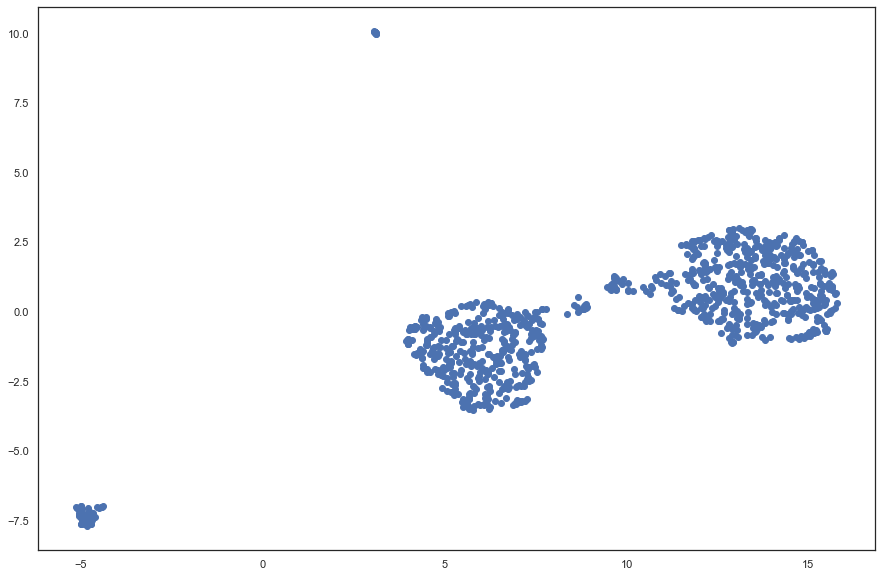

In [9]:
# default scatter, no color
sns.set(style='white', context='notebook', rc={'figure.figsize':(15,10)})
plt.scatter(u[:,0], u[:,1])

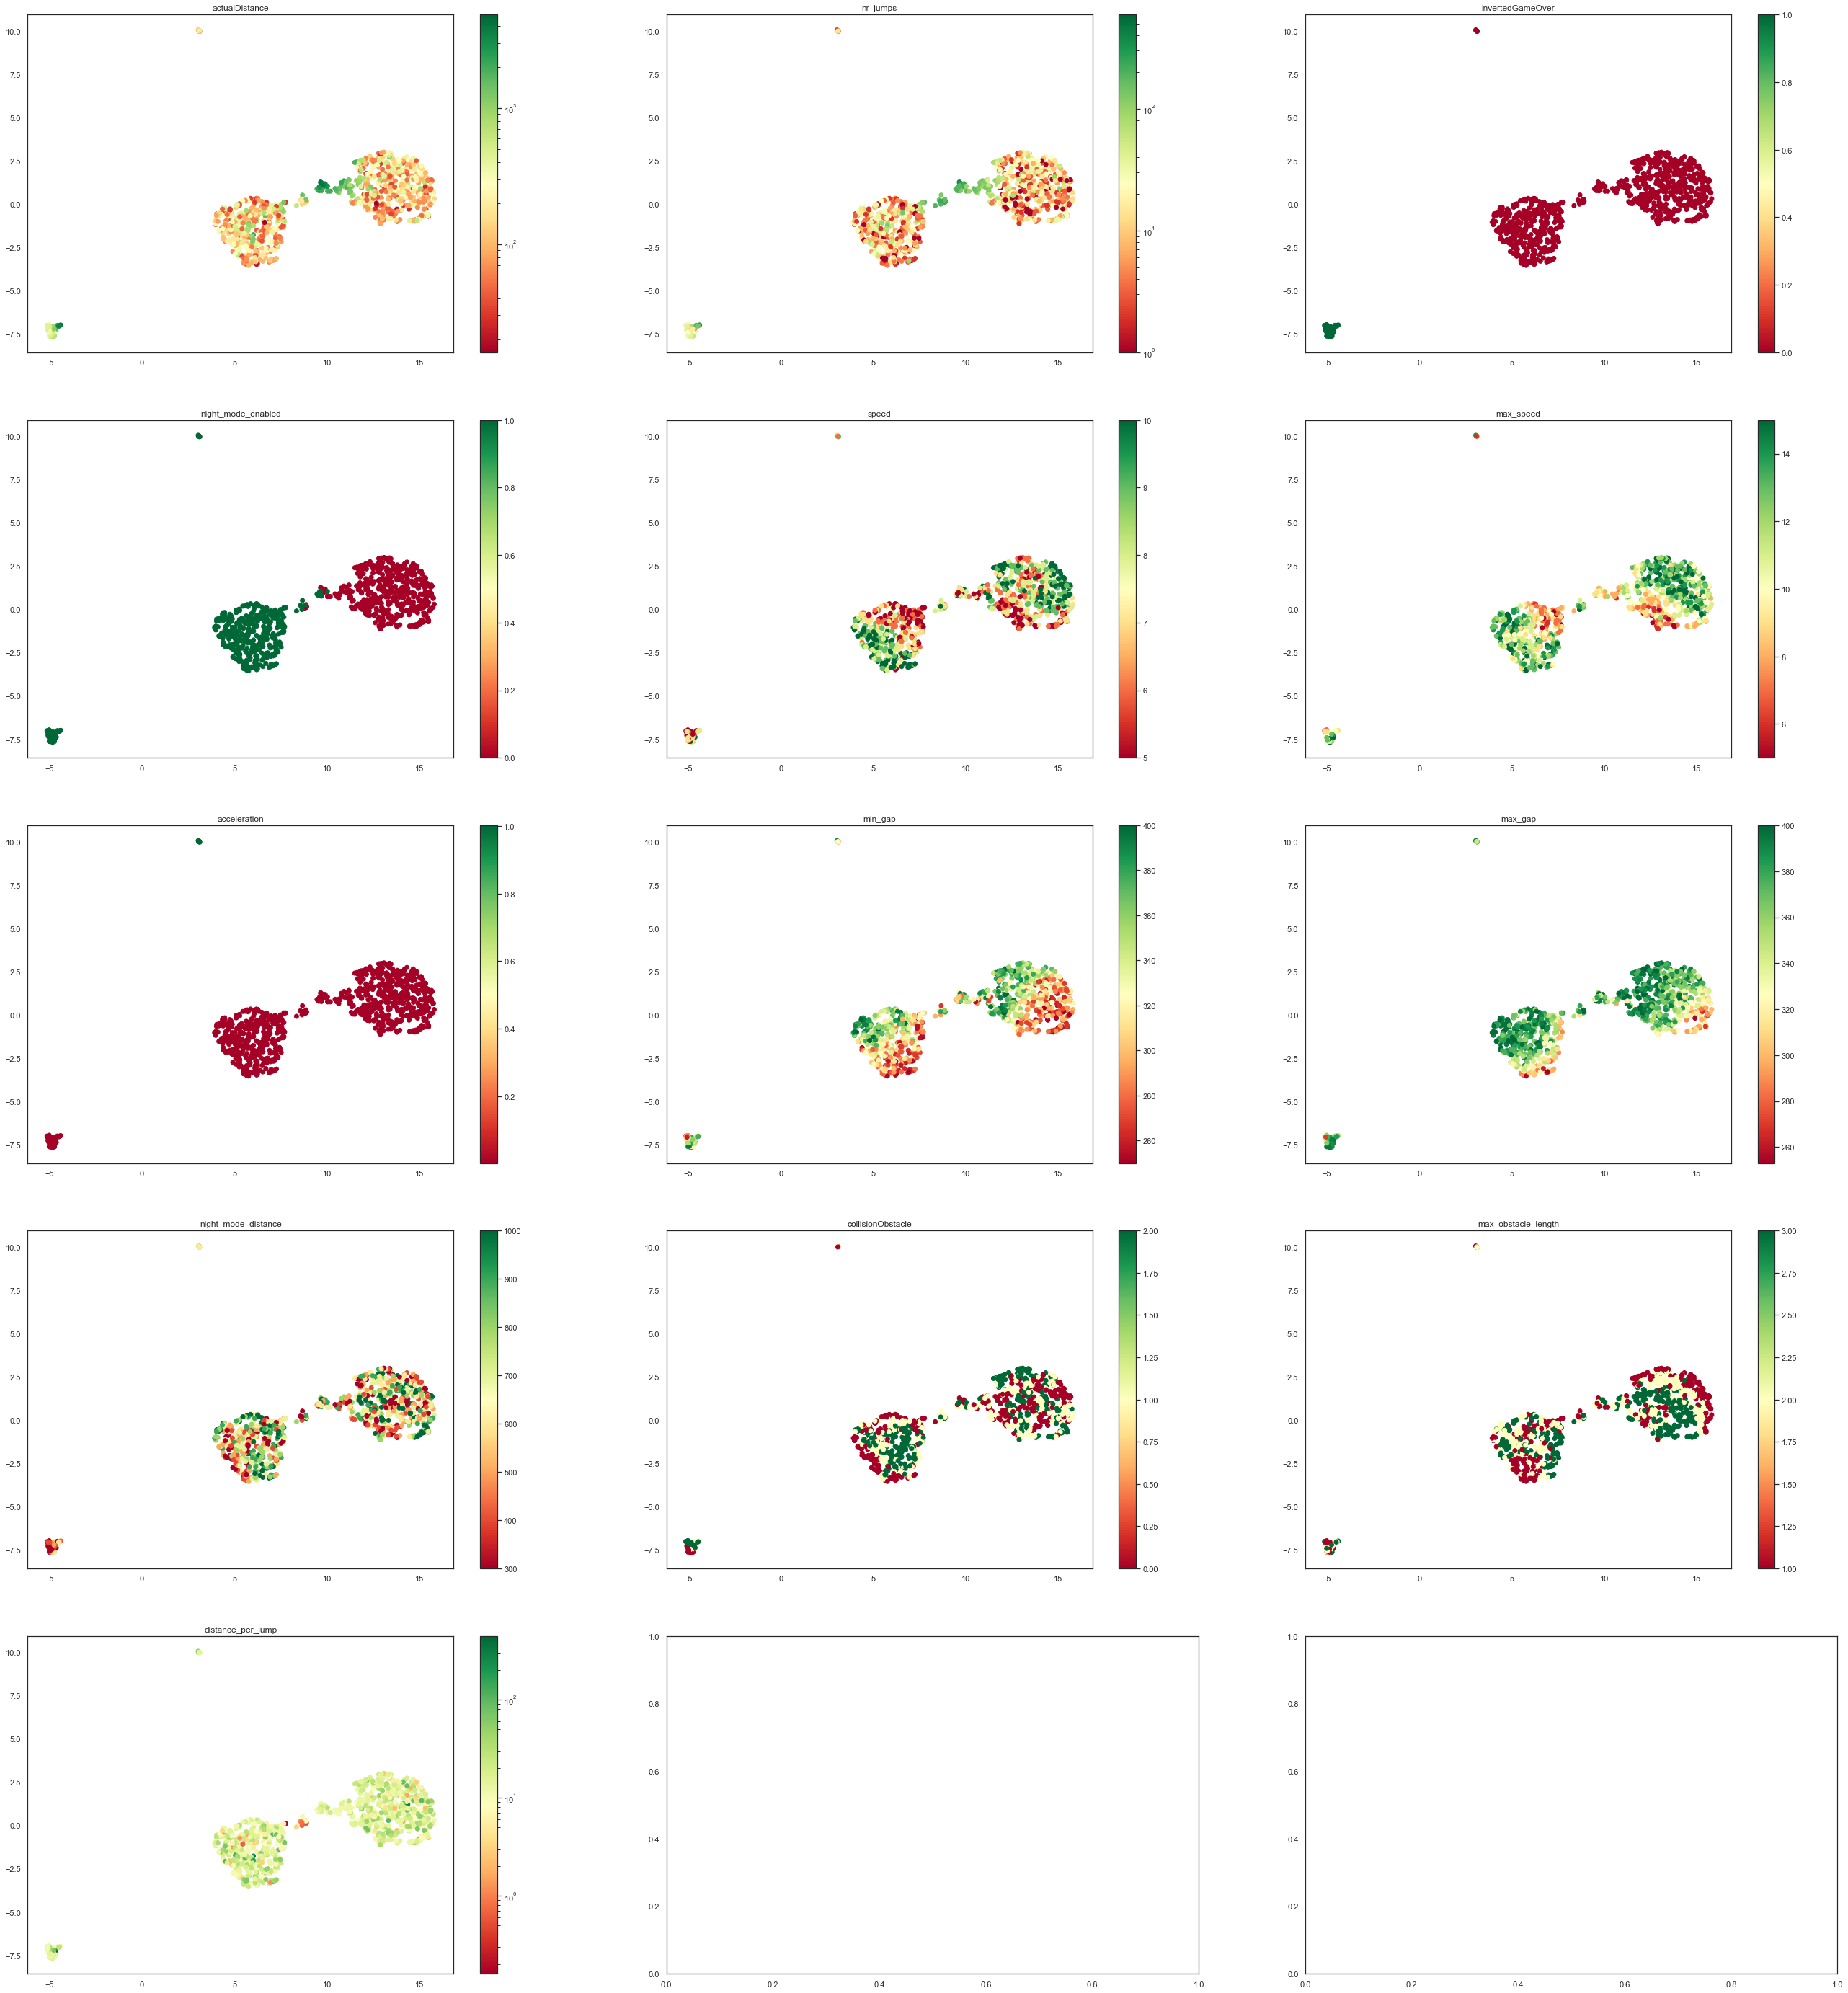

In [13]:
# scatter with color variables
def scatter_umap_color(fit, title='umap scatter', color_values = None, color_map = None, color_norm = None, ax=None):
    if ax is not None:
        p = ax.scatter(fit[:,0], fit[:,1], c = color_values, cmap=color_map, norm=color_norm)
        fig.colorbar(p, ax = ax)
        ax.title.set_text(title) 
    else:
        plt.figure()
        p = plt.scatter(fit[:,0], fit[:,1], c = color_values, cmap=color_map, norm=color_norm)
        plt.colorbar(p)
        plt.title(title)

l = [
    {   
        'title' : 'actualDistance',
        'color_values': gameplays['actualDistance'], 
        'color_map': plt.get_cmap('RdYlGn'),
        'color_norm': matplotlib.colors.LogNorm()
    },
    {   
        'title' : 'nr_jumps',
        'color_values': gameplays['nr_jumps'], 
        'color_map': plt.get_cmap('RdYlGn'),
        'color_norm': matplotlib.colors.LogNorm()
    },
    {   
        'title' : 'invertedGameOver',
        'color_values': gameplays['invertedGameOver'].apply(lambda x: 1 if x else 0), 
        'color_map': plt.get_cmap('RdYlGn'),
        'color_norm': None
    },
    {   
        'title' : 'night_mode_enabled',
        'color_values': gameplays['parameters.NIGHT_MODE_ENABLED'].apply(lambda x: 1 if x else 0), 
        'color_map': plt.get_cmap('RdYlGn'),
        'color_norm': None
    },
    {   
        'title' : 'speed',
        'color_values': gameplays['parameters.SPEED'], 
        'color_map': plt.get_cmap('RdYlGn'),
        'color_norm': None
    },
    {   
        'title' : 'max_speed',
        'color_values': gameplays['parameters.MAX_SPEED'], 
        'color_map': plt.get_cmap('RdYlGn'),
        'color_norm': None
    },
    {   
        'title' : 'acceleration',
        'color_values': gameplays['parameters.ACCELERATION'], 
        'color_map': plt.get_cmap('RdYlGn'),
        'color_norm': None
    },
    {   
        'title' : 'min_gap',
        'color_values': gameplays['parameters.MIN_GAP'], 
        'color_map': plt.get_cmap('RdYlGn'),
        'color_norm': None
    },
    {   
        'title' : 'max_gap',
        'color_values': gameplays['parameters.MAX_GAP'], 
        'color_map': plt.get_cmap('RdYlGn'),
        'color_norm': None
    },
    {   
        'title' : 'night_mode_distance',
        'color_values': gameplays['parameters.NIGHT_MODE_DISTANCE'], 
        'color_map': plt.get_cmap('RdYlGn'),
        'color_norm': None
    },
    {   
        'title' : 'collisionObstacle',
        'color_values': gameplays['collisionObstacle.typeConfig.type'],
        'color_map': plt.get_cmap('RdYlGn'),
        'color_norm': None
    },    
    {   
        'title' : 'max_obstacle_length',
        'color_values': gameplays['parameters.MAX_OBSTACLE_LENGTH'], 
        'color_map': plt.get_cmap('RdYlGn'),
        'color_norm': None
    },
    {   
        'title' : 'distance_per_jump',
        'color_values': gameplays['distance_per_jump'], 
        'color_map': plt.get_cmap('RdYlGn'),
        'color_norm': matplotlib.colors.LogNorm()
    },
    
    
]

import math
l_len = len(l)
columns = 3
y = math.floor(columns)
x = math.ceil(l_len / y)
sns.set(style='white', context='notebook', rc={'figure.figsize':(15*y,10*x)})
fig, ax_array = plt.subplots(x, y) 
for n, entry in enumerate(l):
    i = math.floor(n/columns)
    j = n % columns
    ax = ax_array[i,j]
    scatter_umap_color(u, title=entry['title'], color_values=entry['color_values'], color_map=entry['color_map'], color_norm=entry['color_norm'], ax = ax)
plt.savefig('graphs/notebook/umap/umap_gameplays_colored.png')

In [11]:
gameplays['parameters.ACCELERATION'].groupby(gameplays['parameters.ACCELERATION']).count()

parameters.ACCELERATION
0.002    1040
1.002      13
Name: parameters.ACCELERATION, dtype: int64